##  <u> *Exploratory Data Analysis - EDA*  </u>

In [ ]:
%run C:\Users\Omar\Desktop\Omar_Files\Python_Analysis\Auto_Insurance\Notebooks\Data_Analysis\2_DataCleaning&Preperations.ipynb

---

## *Descrirptive statistics*

### *A.* <u>*categorical & numerical_features:*</u>

In [2]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [3]:
print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 6 numerical features : ['veh_value', 'exposure', 'claimcst0', 'severity', 'frequincy', 'pure_premium']

we have 7 categorical features : ['clm', 'numclaims', 'veh_body', 'veh_age', 'gender', 'area', 'agecat']


---

### *B.* <u>*Basic data statistics:*</u>

* #### *Numerical data statistics :*

In [4]:
df.describe()

,veh_value,exposure,claimcst0,severity,frequincy,pure_premium
count,67856.000000,67856.000000,67856.000000,67856.000000,67856.000000,6.785600e+04
mean,1777.020650,0.468609,137.270167,130.581349,0.214160,7.552586e+02
std,1205.231609,0.290121,1056.297768,1024.457088,2.880223,3.122359e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1010.000000,0.220000,0.000000,0.000000,0.000000,0.000000e+00
50%,1500.000000,0.450000,0.000000,0.000000,0.000000,0.000000e+00
75%,2150.000000,0.710000,0.000000,0.000000,0.000000,0.000000e+00
max,34560.000000,1.000000,55922.129883,55922.000000,365.250000,5.238879e+06


* #### *Categorical data statistics :*

In [5]:
df.describe(include="object")

,clm,numclaims,veh_body,veh_age,gender,area,agecat
count,67856,67856,67856,67856,67856,67856,67856
unique,2,5,13,4,2,6,6
top,0,0,SEDAN,3,F,C,4
freq,63232,63232,22233,20064,38603,20540,16189


---

### *C.* <u>*EDA - Data Visualization:*</u>

* ####  <u> *Numerical features Visualization :*  </u>

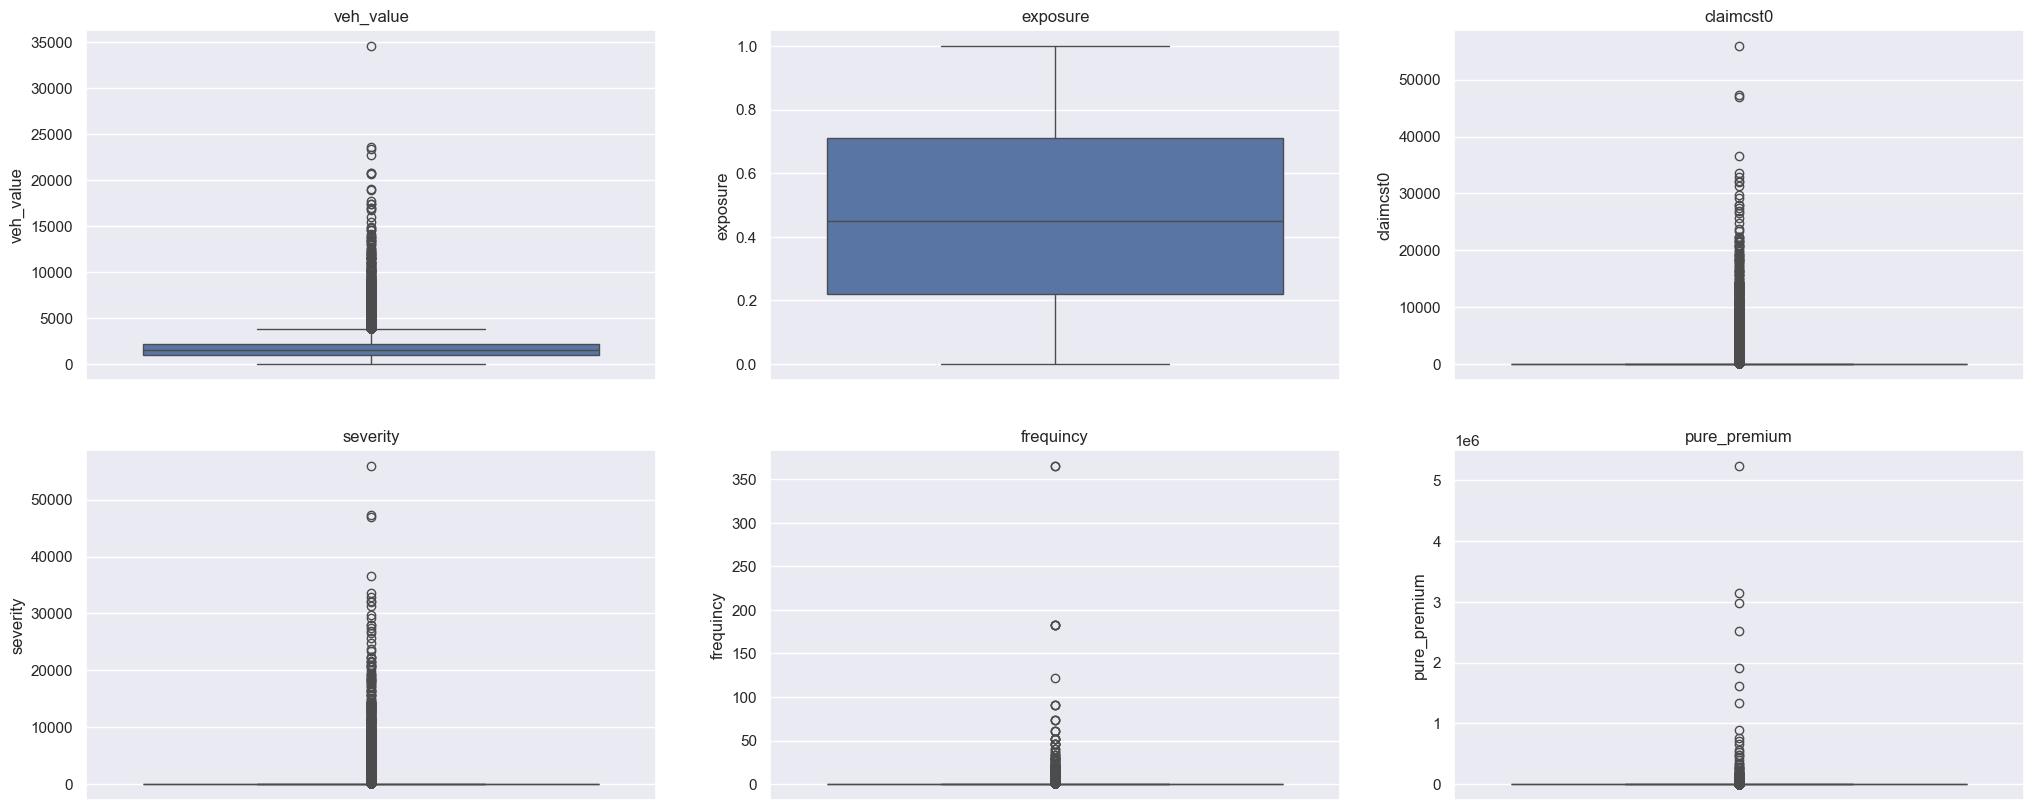

In [6]:
matplotlib.rcParams["figure.figsize"]=(25,10)
plt.subplot(231)
sns.boxplot(df["veh_value"])
plt.title("veh_value");

plt.subplot(232)
sns.boxplot(df["exposure"])
plt.title("exposure");

plt.subplot(233)
sns.boxplot(df["claimcst0"])
plt.title("claimcst0");

plt.subplot(234)
sns.boxplot(df["severity"])
plt.title("severity");

plt.subplot(235)
sns.boxplot(df["frequincy"])
plt.title("frequincy");

plt.subplot(236)
sns.boxplot(df["pure_premium"])
plt.title("pure_premium");

* ####  <u> *Categorical features Visualization :*  </u>

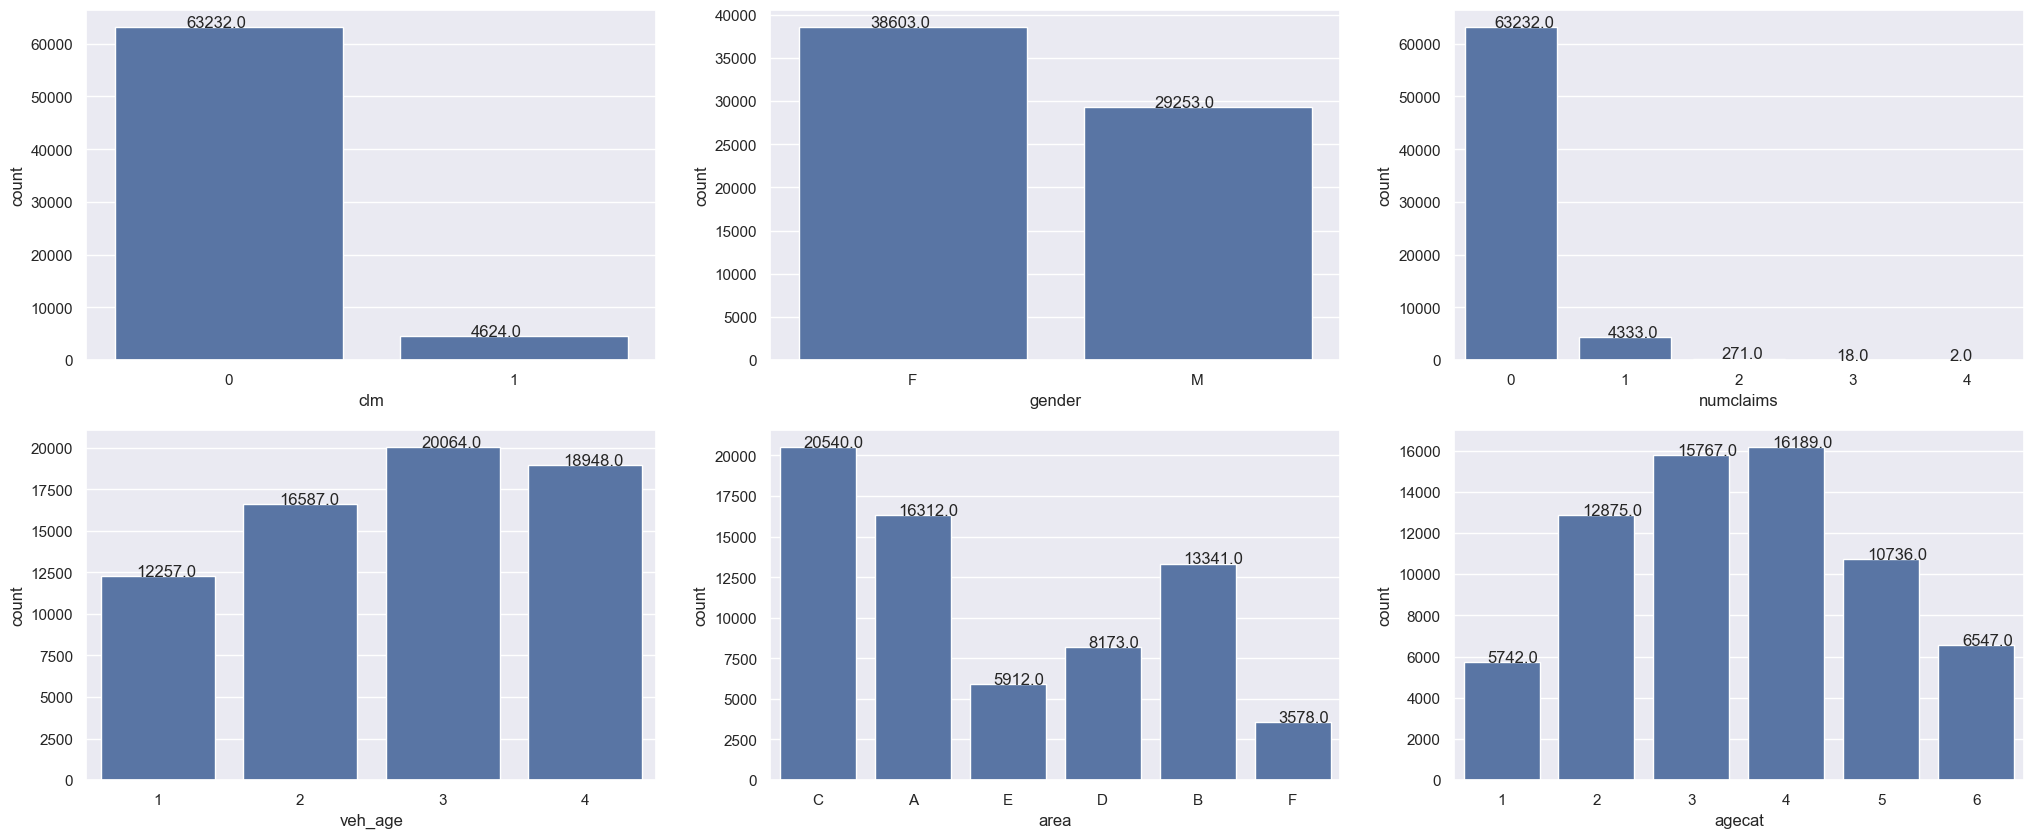

In [7]:
plt.subplot(231)
ax=sns.countplot(data=df,x="clm")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(232)
ax=sns.countplot(data=df,x="gender")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))    

plt.subplot(233)
ax=sns.countplot(data=df,x="numclaims")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  



plt.subplot(234)
ax=sns.countplot(data=df,x="veh_age")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.subplot(235)
ax=sns.countplot(data=df,x="area")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

plt.subplot(236)
ax=sns.countplot(data=df,x="agecat")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  


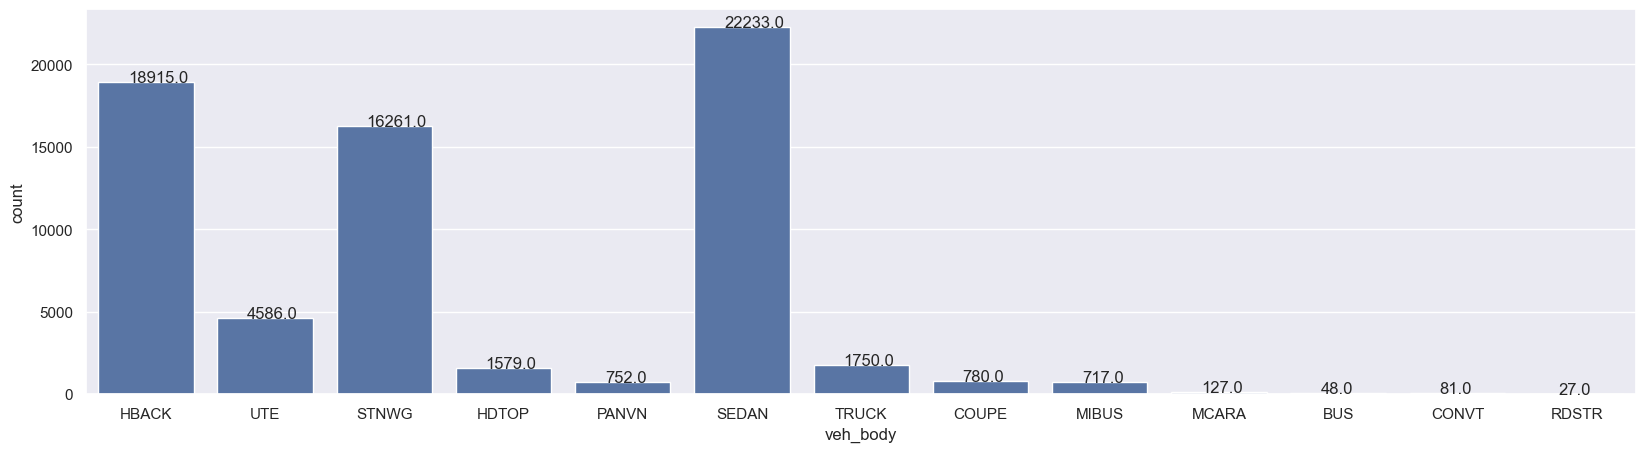

In [8]:
plt.subplots(figsize=(20,5))
ax=sns.countplot(data=df,x="veh_body")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

---

### *C.* <u>*EDA Correlation*</u>

<Axes: >

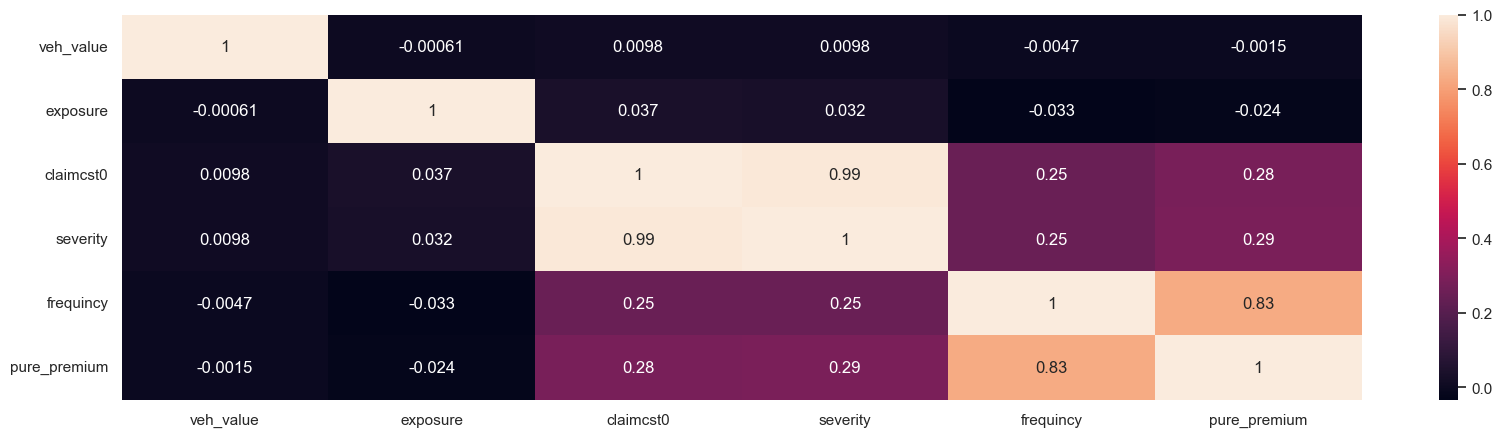

In [9]:
plt.subplots(figsize=(20,5))
sns.heatmap(numerical_features.corr(),annot=True)

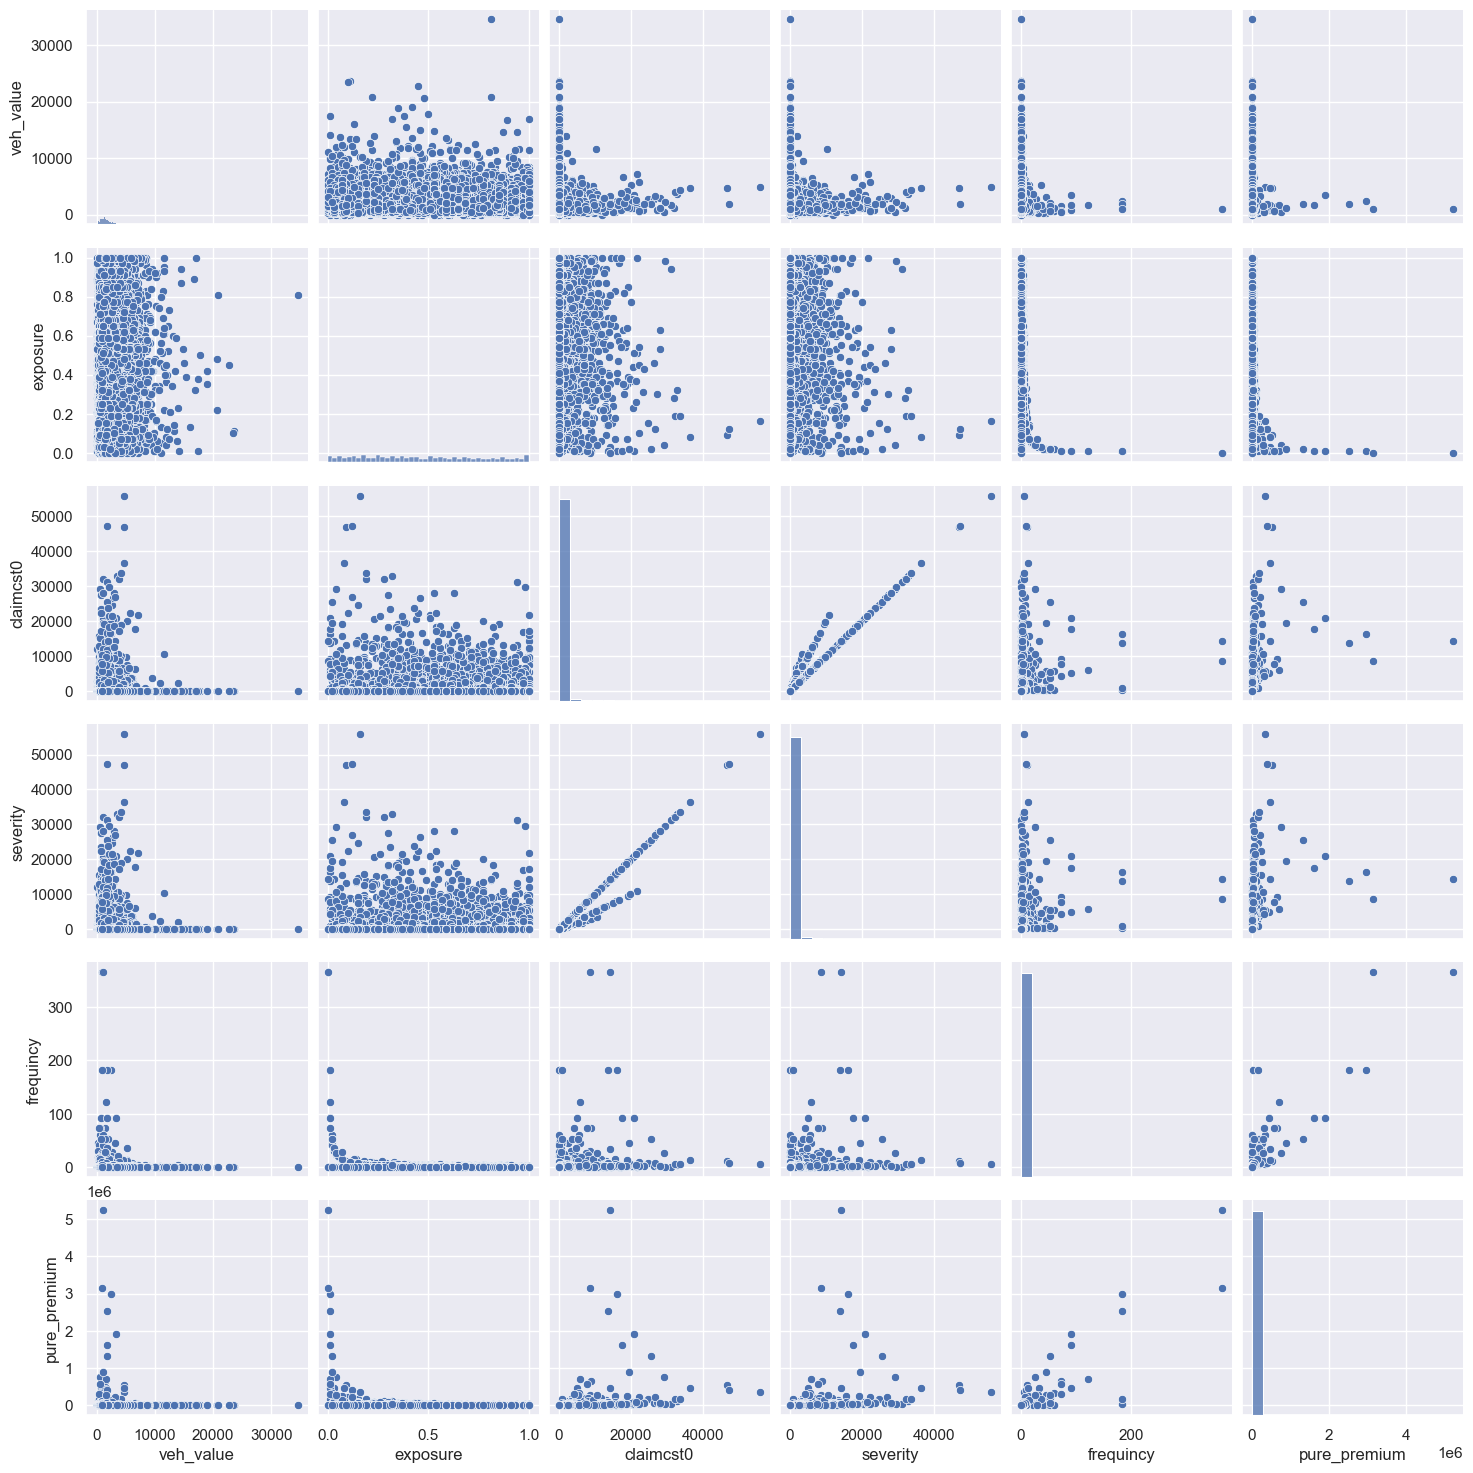

In [10]:
sns.pairplot(numerical_features);

---